# Light Curve 

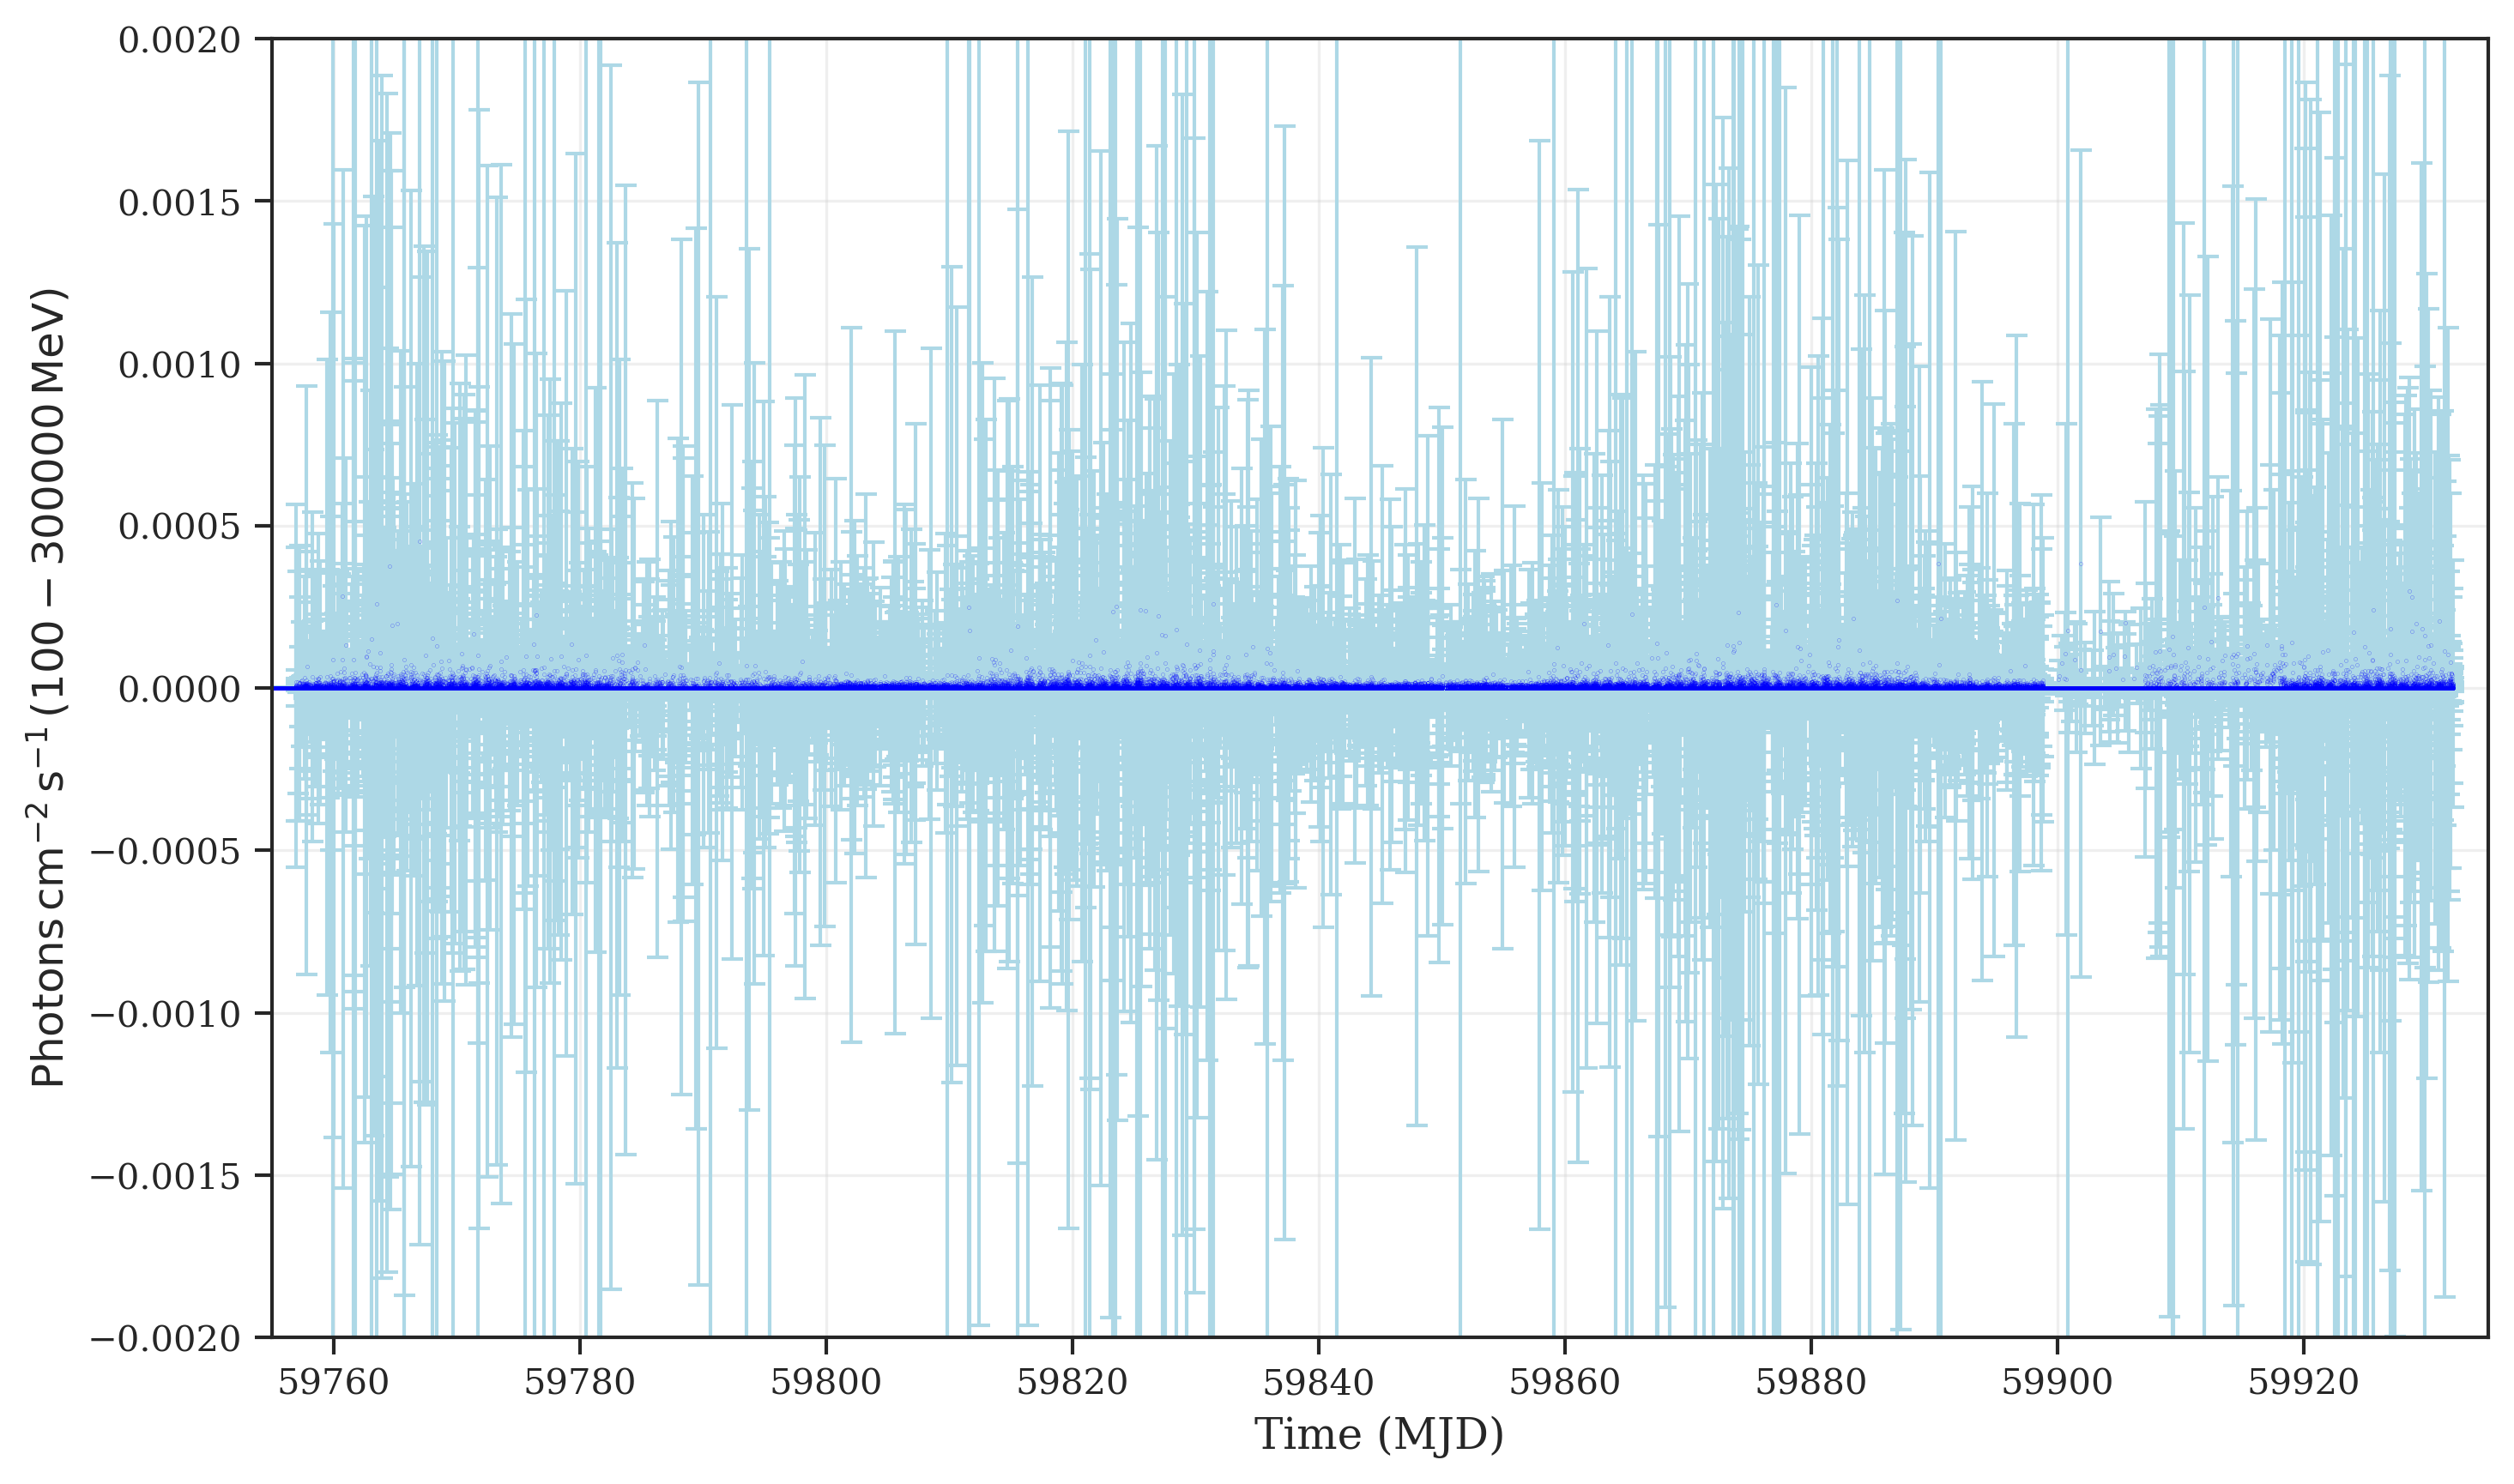

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})


# Configuración de Seaborn
#sns.set(style='darkgrid')

# Cargar los datos desde el archivo
data = np.loadtxt('sagA-clean-gamma.dat')

# Extraer columnas
mjd = data[:, 0]  # MJD
flux = data[:, 1]  # Flujo
error = data[:, 2]  # Error

# Crear el plot
plt.figure(figsize=(10, 6))
plt.errorbar(mjd, flux, yerr=error, fmt='.', color='blue', 
             ecolor='lightblue', elinewidth=1, capsize=3, markersize=.1)
# plt.title('Flujo de Photones ($\mathrm{cm^{-2} \, s^{-1}}$)')
plt.xlabel('Time (MJD)')
plt.xlim(59755, 59935)
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')
plt.ylim(-.002,.002)
plt.grid(True)
# plt.legend()
plt.tight_layout()

# Mostrar el plot
#plt.savefig("images/sagA-gamma-clean-lc.pdf", format='pdf', bbox_inches="tight", dpi=300)
plt.show()


/tmp/ipykernel_7003/312544533.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df2 = pd.read_csv(archivo2, delim_whitespace=True, header=None, names=["frecuencia", "potencia"])


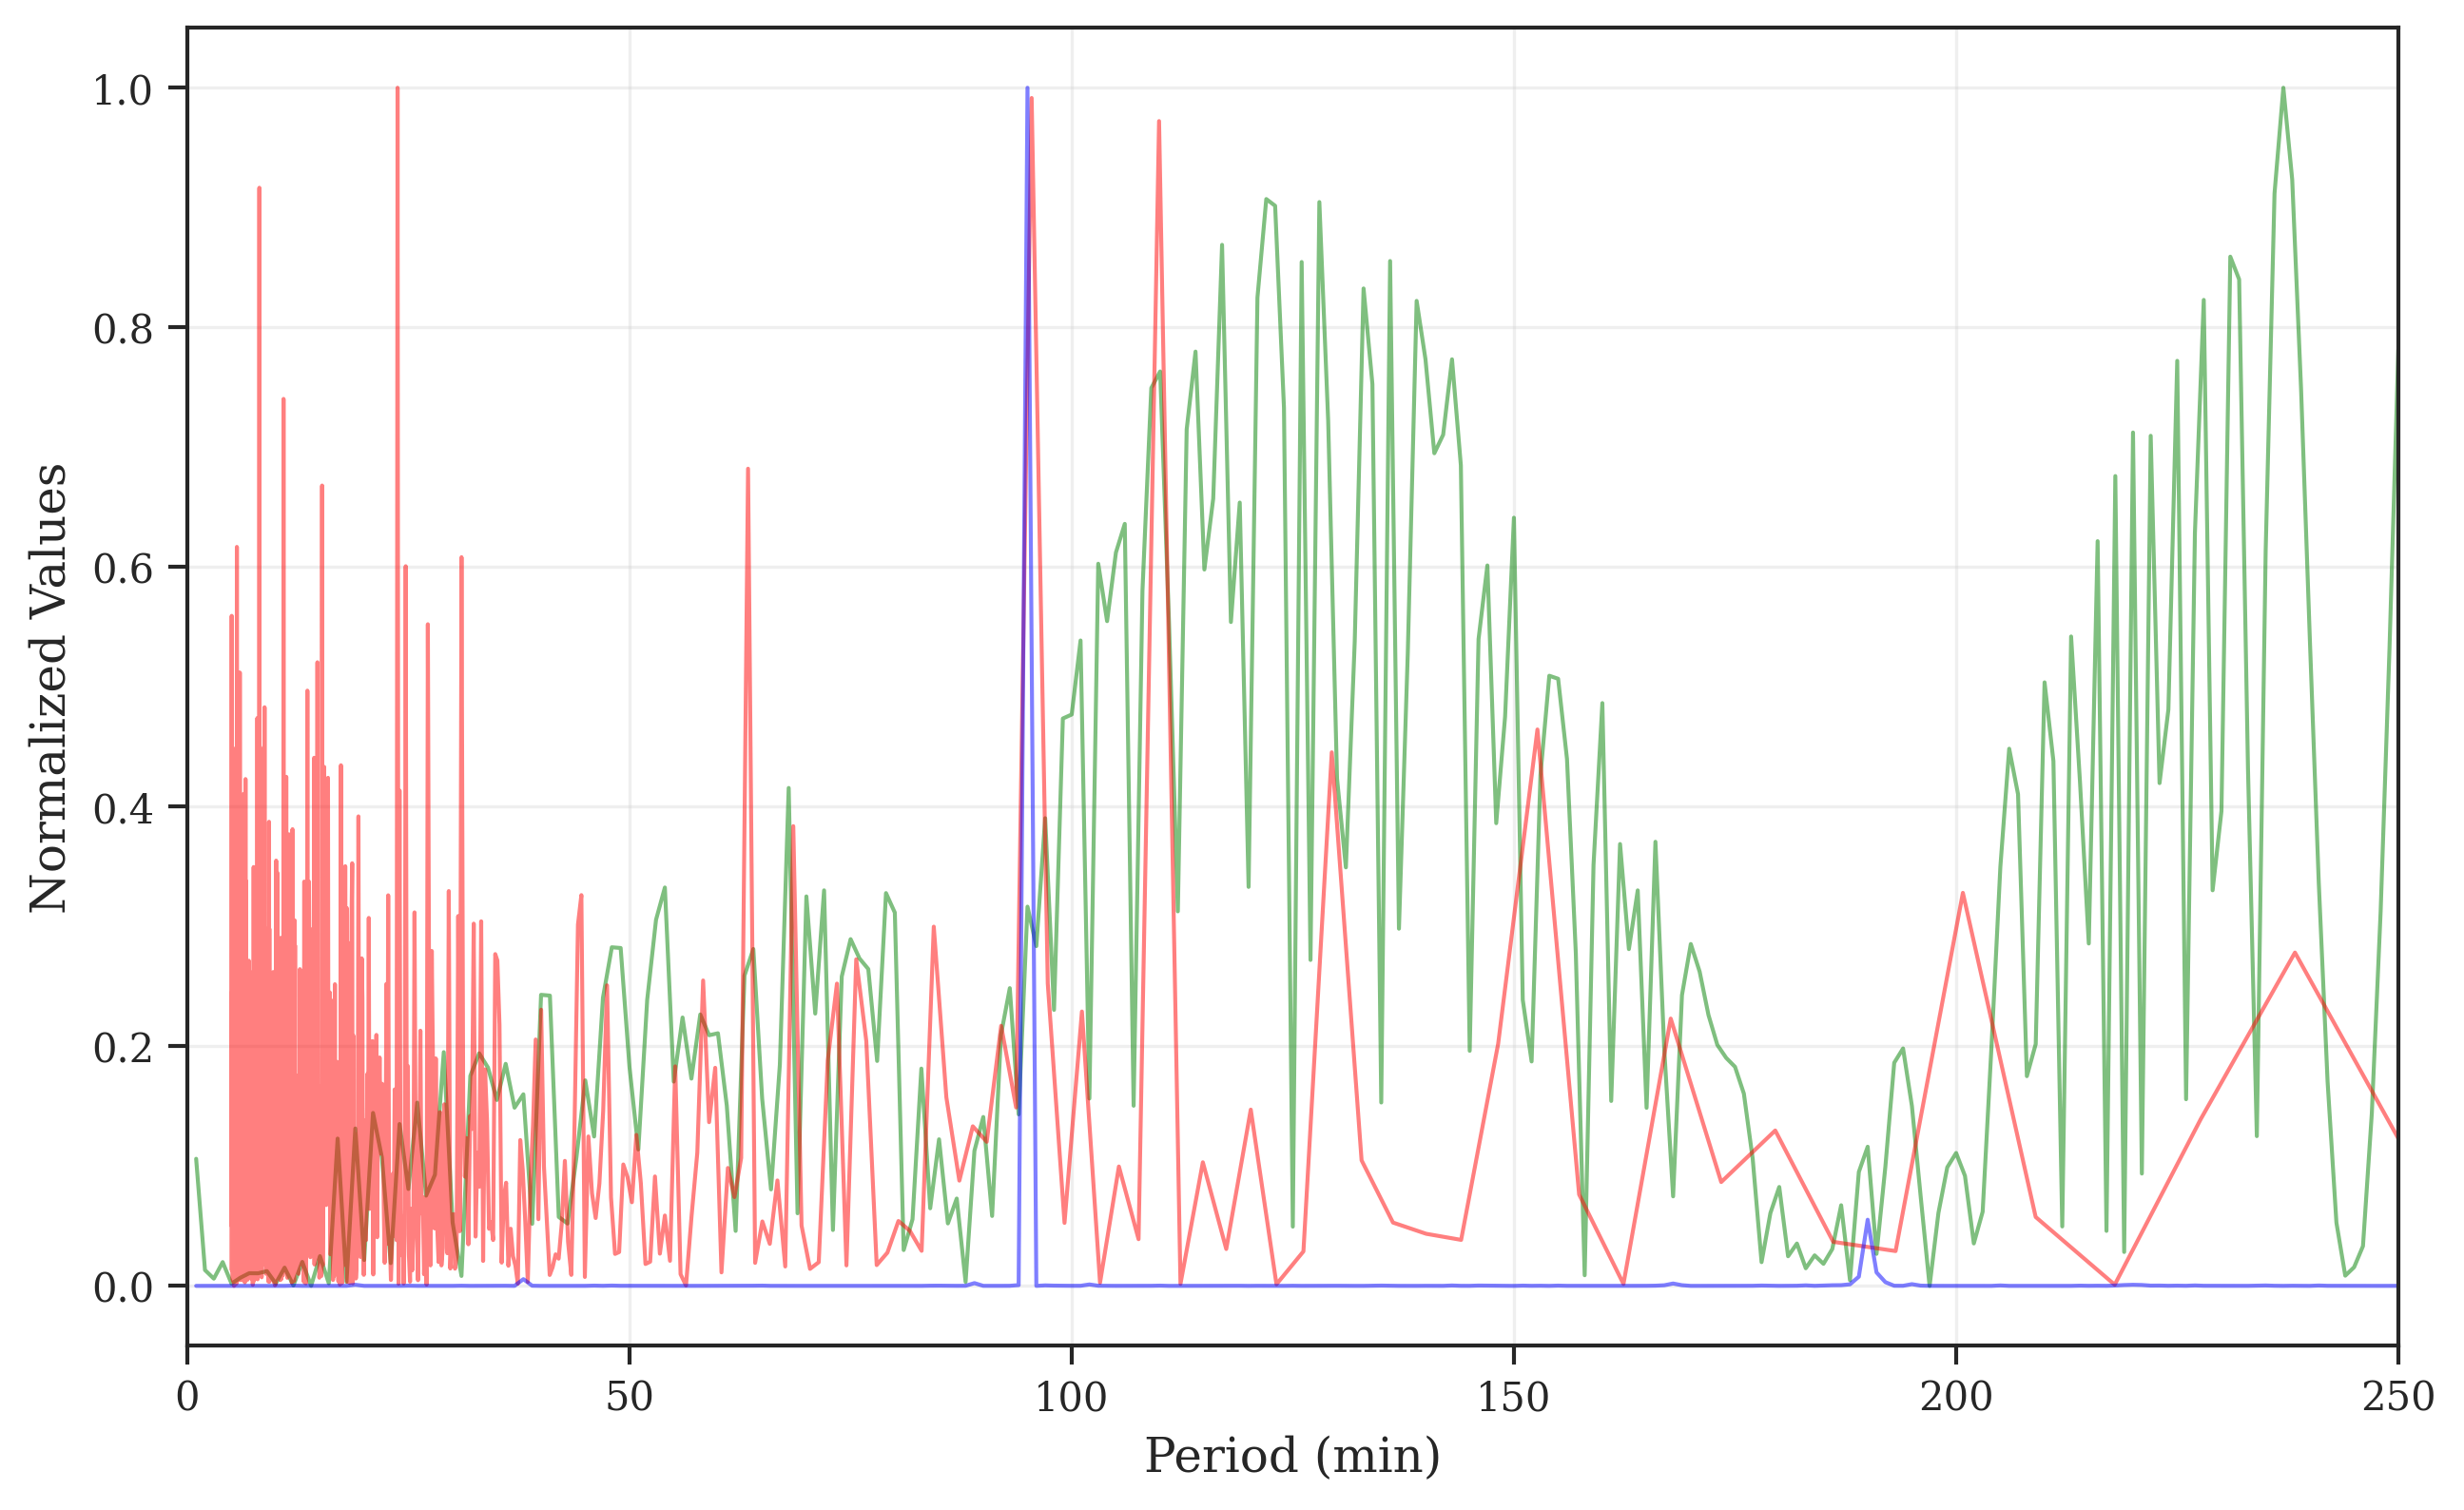

Gráfico guardado como images/figure_1b.pdf


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns.set_palette("muted")

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "font.family": "serif",
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "figure.figsize": (10, 6),
    "axes.grid": True,
    "grid.alpha": 0.3,
    "lines.linewidth": 1,
})

# Rutas de los archivos
archivo1 = "sagA-clean-gamma_periodograma.csv"
archivo2 = "sagA-gamma-wf-serie.dat"
archivo3 = "sagA-clean-gamma.dat_periodograma.csv"

# Cargar los datos de los archivos
df1 = pd.read_csv(archivo1)
df2 = pd.read_csv(archivo2, delim_whitespace=True, header=None, names=["frecuencia", "potencia"])
df3 = pd.read_csv(archivo3)  # Tercer archivo con columnas "Periodo" y "Valor"

# Normalización Min-Max de las columnas de potencia/valor
scaler = MinMaxScaler()
df1['potencia'] = scaler.fit_transform(df1[['potencia']])
df2['potencia'] = scaler.fit_transform(df2[['potencia']])
df3['Valor'] = scaler.fit_transform(df3[['Valor']])

# Crear la figura y los ejes
#plt.figure(figsize=(12, 6))


# Graficar el archivo 2
sns.lineplot(
    x=df2['frecuencia'], 
    y=df2['potencia'], 
    color='green', 
    #linewidth=1, 
    alpha=0.5, 
    #label="Archivo 2"
)


# Graficar el archivo 1
sns.lineplot(
    x=1 / df1['frecuencia'], 
    y=df1['potencia'], 
    color='red', 
    #linewidth=1, 
    alpha=0.5, 
    #label="Archivo 1"
)


# Graficar el archivo 3
sns.lineplot(
    x=df3['Periodo'], 
    y=df3['Valor'], 
    color='blue', 
    linewidth=1, 
    alpha=0.5, 
    #label="Archivo 3"
)

# Sombrear la región entre x=94 y x=96
# plt.axvspan(94, 96, color='gray', alpha=0.3)

# Etiquetas y título
plt.xlabel("Period (min)")
plt.ylabel("Normalized Values")
plt.xlim(0, 250)

# Agregar leyenda
#plt.legend(loc="upper right", fontsize=12)

#plt.tight_layout()

# Guardar la gráfica en PDF
output_file = "images/figure_1b.pdf"
plt.savefig(output_file, format="pdf", bbox_inches="tight", dpi=300)
# Mostrar la gráfica
plt.show()

print(f"Gráfico guardado como {output_file}")


## Checamos los valores de Lomb-Scargle (No normalizados)

In [28]:
import pandas as pd

# Cargar el archivo CSV
filename = "sagA-clean-gamma_periodograma.csv"
data = pd.read_csv(filename)

# Verificar que las columnas sean las correctas
if "frecuencia" in data.columns and "potencia" in data.columns:
    # Calcular el período como el inverso de la frecuencia
    data["periodo"] = 1 / data["frecuencia"]

    # Ordenar los datos por la columna 'potencia' en orden descendente
    top_5 = data.nlargest(5, 'potencia')

    # Configurar pandas para mostrar números completos
    pd.set_option('display.float_format', '{:.16f}'.format)

    # Reordenar las columnas para que 'periodo' esté a la izquierda
    top_5 = top_5[["periodo", "frecuencia", "potencia"]]

    # Mostrar los 5 valores más altos con la nueva columna
    print("Top 5 valores más altos de la columna 'potencia':")
    print(top_5)
else:
    print("El archivo no contiene las columnas 'frecuencia' y 'potencia'.")


Top 5 valores más altos de la columna 'potencia':
                 periodo         frecuencia                  potencia
194  23.7743931461209321 0.0420620620620620 10323817.2558697927743196
33   95.4701834862392076 0.0104744744744744 10235675.9460176900029182
26  109.8768147822261483 0.0091011011011011 10036779.7094353716820478
605   8.1500456859417820 0.1226986986986987  9462303.5416310485452414
448  10.8818787852381149 0.0918958958958959  7642873.3883436713367701


## Checamos los valores de Lomb-Scargle (Normalizados)

In [29]:
df1.iloc[90:100]

,frecuencia,potencia
90,0.0216576576576576,0.0566258264538397
91,0.0218538538538538,0.0772736998928895
92,0.0220500500500500,0.1247193089255687
93,0.0222462462462462,0.0074369966217688
94,0.0224424424424424,0.3261625240108886
95,0.0226386386386386,0.3016101576373341
96,0.0228348348348348,0.1379625147606730
97,0.0230310310310310,0.0091386154517125
98,0.0232272272272272,0.0367472883847855
99,0.0234234234234234,0.1043471304867412


## Checamos los valores de la window function

In [30]:
df2.iloc[90:100]

,frecuencia,potencia
90,91.0000000000000000,0.0583412849614896
91,92.0000000000000000,0.2094904873440880
92,93.0000000000000000,0.2484938203333475
93,94.0000000000000000,0.1431518582915944
94,95.0000000000000000,0.3165064991178969
95,96.0000000000000000,0.2835876478018510
96,97.0000000000000000,0.3903250901766148
97,98.0000000000000000,0.2303532517236585
98,99.0000000000000000,0.4735670121181697
99,100.0000000000000000,0.4768893944100001


## Checamos los valores del RobPer (NO Normalizados) 

In [40]:
import pandas as pd

# Cargar el archivo CSV
archivo = "sagA-clean-gamma.dat_periodograma.csv"
df = pd.read_csv(archivo)

# Ordenar por la columna "Valor" en orden descendente y seleccionar los 5 valores más altos
top_5 = df.nlargest(5, 'Valor')

# Mostrar los resultados
print("Los 5 valores más altos del archivo son:")
print(top_5)

# Guardar los resultados en un nuevo archivo CSV (opcional)
output_file = "top_5_valores.csv"
top_5.to_csv(output_file, index=False)
print(f"Resultados guardados en: {output_file}")


Los 5 valores más altos del archivo son:
     Periodo              Valor
94        95 0.3379585708434640
189      190 0.0186581414562683
190      191 0.0037923461021099
188      189 0.0025913730188148
37        38 0.0018948008382536
Resultados guardados en: top_5_valores.csv


## Checamos los valores de Robper  (Normalizados)

In [33]:
df3.iloc[90:100]

,Periodo,Valor
90,91,0.0000802900212904
91,92,0.0000383685508952
92,93,0.0000694437999617
93,94,0.0006452952867764
94,95,0.9999999999999999
95,96,0.0000116663232019
96,97,0.0004084299385490
97,98,0.0002058299601054
98,99,0.0001329234368211
99,100,0.0000711246885360
